# Preprocessing and Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/dataset.csv', index_col=0)
data.head()

Variants  Fitness
ID                      
133462     TNTY      0.0
30784      APPP      0.0
130974     TFFM      0.0
9290       IDMW      0.0
43174      DRNQ      0.0

In [3]:
len(data)

570

## Process the data such that each AA is a number

separate the string into individual characters with mapping from 0-19

In [4]:
mapping = pd.Series(range(20), index=['A','R','N','D','C','Q','E','G','H','I','L','K','M','F','P','S','T','W','Y','V'])

def tokenize(x):
    return [mapping[i] for i in x]

token_data = data['Variants'].apply(tokenize)
token_data = pd.DataFrame(token_data.to_list(), index=token_data.index)
token_data.head()

0   1   2   3
ID                    
133462  16   2  16  18
30784    0  14  14  14
130974  16  13  13  12
9290     9   3  12  17
43174    3   1   2   5

### Check if all AAs are represented in all position

In [5]:
token_data.nunique()

0    20
1    20
2    20
3    20
dtype: int64

In [6]:
pd.DataFrame([token_data.value_counts(i, sort=False) for i in range(3)])

0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
count  29  33  33  29  32  38  30  31  29  31  25  21  32  24  25  27  26  27   
count  24  33  36  31  31  16  27  31  21  30  25  28  27  38  29  26  28  27   
count  25  23  28  25  28  27  20  37  28  24  31  30  24  37  33  26  29  24   

       18  19  
count  20  28  
count  42  20  
count  38  33

Everything seems to be represented in all positions (at least in 1-gram)

### Check the distribution of labels and process if needed

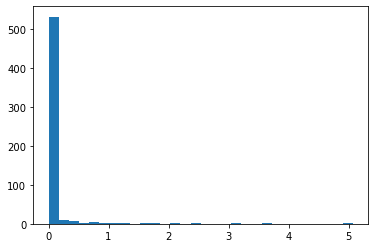

In [7]:
_ = plt.hist(data['Fitness'], bins=30)

The fitness is actually relative to VDGV, so it's possible to have > 1

I can either:
- keep the labels as given
- log transform
- clip to the range 0 to 1 (if we do not care if >1)

In [8]:
data['log_fitness'] = np.log(data['Fitness']+1e-4)
data['clip_fitness'] = np.clip(data['Fitness'], a_min=0, a_max=1)

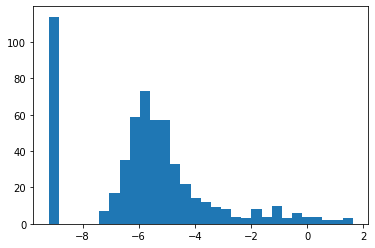

In [9]:
plt.hist(data['log_fitness'], bins=30)
plt.show()

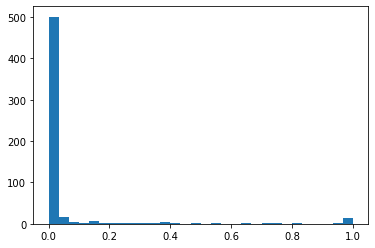

In [10]:
plt.hist(data['clip_fitness'], bins=30)
plt.show()

## Split the data
I assume that the remaining variants from the paper (but not in this dataset) are the test set. So I will be splitting into 5-folds, but assume that I only need a validation set (i.e., no need to nest). I will be fixing the folds for simplicity and replicability of the subsequent codes.

In [11]:
perm = np.random.permutation(data.index)

data.loc[perm, 'fold'] = [i%5 for i in range(len(data))]
data = data.join(token_data)
data['fold'] = data['fold'].astype(int)
data.head()

Variants  Fitness  log_fitness  clip_fitness  fold   0   1   2   3
ID                                                                       
133462     TNTY      0.0     -9.21034           0.0     1  16   2  16  18
30784      APPP      0.0     -9.21034           0.0     2   0  14  14  14
130974     TFFM      0.0     -9.21034           0.0     3  16  13  13  12
9290       IDMW      0.0     -9.21034           0.0     1   9   3  12  17
43174      DRNQ      0.0     -9.21034           0.0     2   3   1   2   5

In [12]:
data.to_csv('data/preprocessed_data.csv')